In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
cpi_df = pd.read_csv('data\BLS_Seafood_CPI.csv')
ppi_df = pd.read_csv('data\BLS_Seafood_PPI.csv')
#temp_df = pd.read_csv('data\US_temp.csv',encoding = "utf-8")
capture_df = pd.read_csv('data\FAO_Capture_data\Capture_Quantity.csv')

In [3]:
#Relable columns, group by year, remove unwanted columns for CPI and PPI dfs

In [29]:
cpi = cpi_df.groupby('Year').agg(mean_CPI=('Value', 'mean'))
cpi.head()

,mean_CPI
Year,
1935,6.175000
1936,6.200000
1937,6.325000
1938,6.358333
1939,6.333333


In [28]:
ppi = ppi_df.groupby('Year').agg(mean_PPI=('Value', 'mean'))
ppi.head()

,mean_PPI
Year,
1984,100.000000
1985,98.166667
1986,99.491667
1987,108.125000
1988,119.808333


In [6]:
# Clean Capture data, filter by US data

In [7]:
capture_df.head()

,COUNTRY.UN_CODE,SPECIES.ALPHA_3_CODE,AREA.CODE,MEASURE,PERIOD,VALUE,STATUS
0,4,FRF,4,Q_tlw,2020,2000.0,E
1,4,FRF,4,Q_tlw,2019,2100.0,E
2,4,FRF,4,Q_tlw,2018,2050.0,E
3,4,FRF,4,Q_tlw,2017,2000.0,E
4,4,FRF,4,Q_tlw,2016,1900.0,E


In [8]:
#filter to only the USA
capture = capture_df[(capture_df['COUNTRY.UN_CODE'] == 840)]
capture

,COUNTRY.UN_CODE,SPECIES.ALPHA_3_CODE,AREA.CODE,MEASURE,PERIOD,VALUE,STATUS
956473,840,CTM,2,Q_tlw,2018,15.0,NaN
956474,840,CTM,2,Q_tlw,2017,24.0,NaN
956475,840,CTM,2,Q_tlw,2016,27.0,NaN
956476,840,CTM,2,Q_tlw,2015,21.0,NaN
956477,840,CTM,2,Q_tlw,2014,22.0,NaN
...,...,...,...,...,...,...,...
997606,840,SWG,77,Q_tlw,1999,0.0,NaN
997607,840,SWG,77,Q_tlw,1998,0.0,NaN
997608,840,SWG,77,Q_tlw,1997,0.0,NaN
997609,840,SWG,77,Q_tlw,1996,0.0,NaN


In [9]:
capture = capture.pivot_table(index='PERIOD',columns='SPECIES.ALPHA_3_CODE',values='VALUE')
capture

SPECIES.ALPHA_3_CODE,AAC,AAM,ABS,ABU,ABX,ACH,AGG,AGM,AGR,AIP,...,YNR,YRG,YRO,YSB,YSE,YSF,YSH,YSO,YTC,YTL
PERIOD,,,,,,,,,,,,,,,,,,,,,
1950,NaN,NaN,48668.0,NaN,1795.0,NaN,NaN,NaN,NaN,NaN,...,213.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1601.0,NaN
1951,NaN,NaN,57249.0,NaN,1850.0,NaN,NaN,NaN,NaN,NaN,...,252.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2118.0,NaN
1952,NaN,NaN,57900.0,NaN,2170.0,NaN,NaN,NaN,NaN,NaN,...,260.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4285.0,NaN
1953,NaN,NaN,66560.0,NaN,2140.0,NaN,NaN,NaN,NaN,NaN,...,406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2364.0,NaN
1954,NaN,NaN,68722.0,NaN,1860.0,NaN,NaN,NaN,NaN,NaN,...,692.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,752.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,133.0,NaN,19268.5,0.0,NaN,NaN,0.0,553372.0,564.0,NaN,...,4.5,4.0,1411.0,17.0,30.0,213.0,29.5,4.0,26.0,35.0
2017,101.0,NaN,21463.5,0.0,NaN,NaN,0.0,463466.0,463.0,0.0,...,4.5,1.0,2715.0,21.0,16.0,254.0,43.0,4.0,30.0,35.0
2018,113.0,NaN,26939.0,0.0,NaN,NaN,0.0,596258.0,492.0,NaN,...,4.0,11.0,3217.0,19.0,10.0,255.0,29.0,5.0,19.0,43.5


In [10]:
#replace na values with zeros
capture.fillna(0)

SPECIES.ALPHA_3_CODE,AAC,AAM,ABS,ABU,ABX,ACH,AGG,AGM,AGR,AIP,...,YNR,YRG,YRO,YSB,YSE,YSF,YSH,YSO,YTC,YTL
PERIOD,,,,,,,,,,,,,,,,,,,,,
1950,0.0,0.0,48668.0,0.0,1795.0,0.0,0.0,0.0,0.0,0.0,...,213.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1601.0,0.0
1951,0.0,0.0,57249.0,0.0,1850.0,0.0,0.0,0.0,0.0,0.0,...,252.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2118.0,0.0
1952,0.0,0.0,57900.0,0.0,2170.0,0.0,0.0,0.0,0.0,0.0,...,260.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4285.0,0.0
1953,0.0,0.0,66560.0,0.0,2140.0,0.0,0.0,0.0,0.0,0.0,...,406.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2364.0,0.0
1954,0.0,0.0,68722.0,0.0,1860.0,0.0,0.0,0.0,0.0,0.0,...,692.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,752.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,133.0,0.0,19268.5,0.0,0.0,0.0,0.0,553372.0,564.0,0.0,...,4.5,4.0,1411.0,17.0,30.0,213.0,29.5,4.0,26.0,35.0
2017,101.0,0.0,21463.5,0.0,0.0,0.0,0.0,463466.0,463.0,0.0,...,4.5,1.0,2715.0,21.0,16.0,254.0,43.0,4.0,30.0,35.0
2018,113.0,0.0,26939.0,0.0,0.0,0.0,0.0,596258.0,492.0,0.0,...,4.0,11.0,3217.0,19.0,10.0,255.0,29.0,5.0,19.0,43.5


In [11]:
# A look at fish species capture quantities

In [37]:
# Filter most common species types, remove zero values and sort descending by total sum
species_list = capture.sum(axis=0).sort_values(ascending=False)
species_list = species_list[(species_list > 10)]
species_list.head(10)

SPECIES.ALPHA_3_CODE
ALK    4.830582e+07
MHG    3.740861e+07
MHA    1.385119e+07
AGM    1.033169e+07
PCO    9.134201e+06
CLB    8.300360e+06
SCA    6.825747e+06
NHA    6.451522e+06
PIN    5.735204e+06
CLQ    5.057766e+06
dtype: float64

In [38]:
species_list.info()

<class 'pandas.core.series.Series'>
Index: 570 entries, ALK to BEW
Series name: None
Non-Null Count  Dtype  
--------------  -----  
570 non-null    float64
dtypes: float64(1)
memory usage: 8.9+ KB


In [20]:
# Creates plots of top species capture rates over time

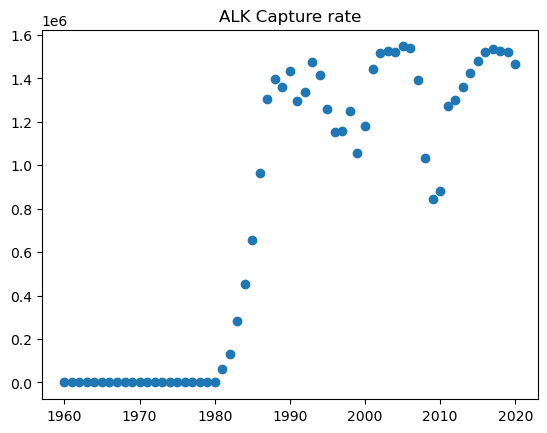

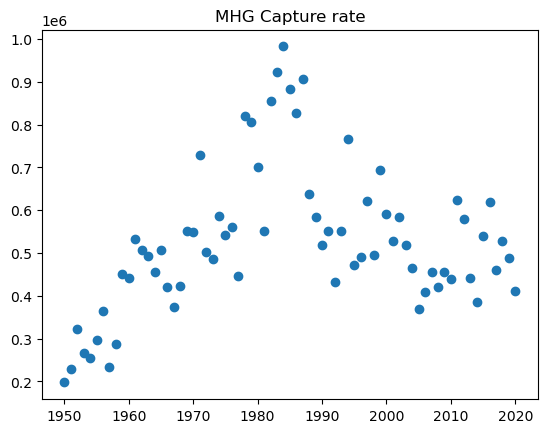

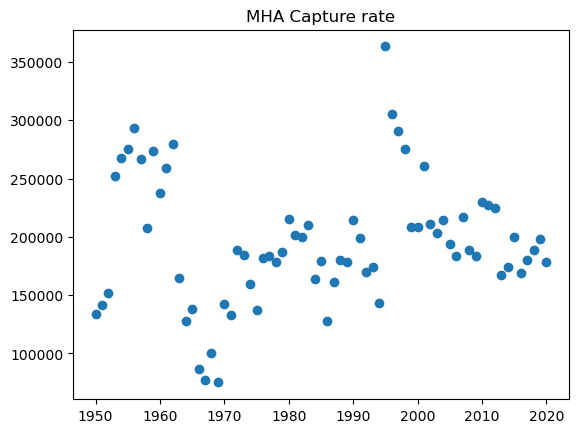

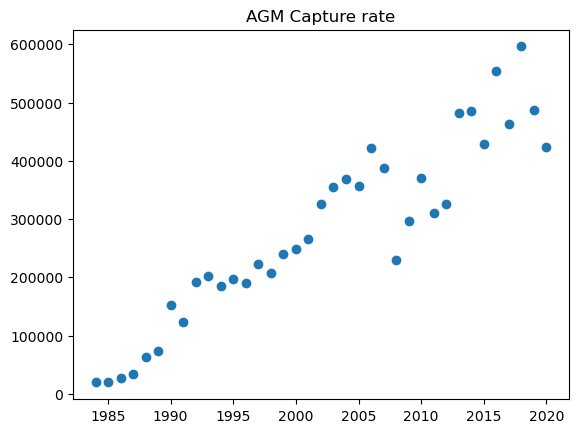

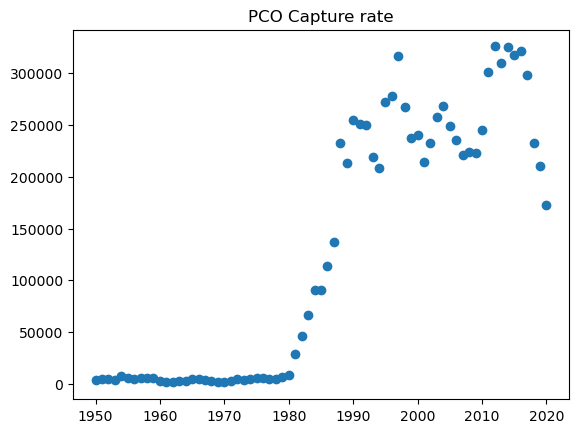

In [27]:
# First plot
ax = plt.subplot()
plt.scatter(x=capture.index,y=capture.ALK)
plt.title('ALK Capture rate')
plt.show()

ax = plt.subplot()
plt.scatter(x=capture.index,y=capture.MHG)
plt.title('MHG Capture rate')
plt.show()

ax = plt.subplot()
plt.scatter(x=capture.index,y=capture.MHA)
plt.title('MHA Capture rate')
plt.show()

ax = plt.subplot()
plt.scatter(x=capture.index,y=capture.AGM)
plt.title('AGM Capture rate')
plt.show()

ax = plt.subplot()
plt.scatter(x=capture.index,y=capture.PCO)
plt.title('PCO Capture rate')
plt.show()